In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import word_tokenize #word tokenizer

In [132]:
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\chith\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [119]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [2]:
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [3]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [4]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [5]:
doc_list=[]
doc_list.append(inaugural.raw('1941-Roosevelt.txt'))
doc_list.append(inaugural.raw('1961-Kennedy.txt'))
doc_list.append(inaugural.raw('1973-Nixon.txt'))
documents=pd.Series(data=doc_list,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])
doc_df=pd.DataFrame(documents,columns=['Speech'])

In [6]:
doc_df.head()

,Speech
1941-Roosevelt,On each national day of inauguration since 178...
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


#### Find the number of characters, words and sentences for the mentioned documents. 

In [9]:
#Number of characters with space
[len(x) for x in doc_df.Speech]

[7571, 7618, 9991]

In [120]:
doc_df.Speech.apply(lambda x: len(x))

1941-Roosevelt    7571
1961-Kennedy      7618
1973-Nixon        9991
Name: Speech, dtype: int64

In [10]:
#No. od characters without Space
no_char=0
doc_df.Speech.apply(lambda x: sum([len(x) for x in x.split()]))

1941-Roosevelt    6174
1961-Kennedy      6202
1973-Nixon        8122
Name: Speech, dtype: int64

In [11]:
#No. of words
[len(x.split()) for x in doc_df['Speech']]


[1360, 1390, 1819]

In [123]:
doc_df.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    1360
1961-Kennedy      1390
1973-Nixon        1819
Name: Speech, dtype: int64

In [12]:
def no_sentence(doc):
    n=0
    n=len(re.findall('[^:,][\n]+',doc)) #exclude , or : since that becomes a phrase
    n+=len(re.findall('\?[^\n]',doc)) # Questions(end with ? withput \n)
    return n

In [13]:
for ind,doc in doc_df.iterrows():
    no_sentences=no_sentence(doc.Speech)
    print("No. of sentences in {}'s inaugral Speech is".format(ind),no_sentences)

No. of sentences in 1941-Roosevelt's inaugral Speech is 38
No. of sentences in 1961-Kennedy's inaugral Speech is 28
No. of sentences in 1973-Nixon's inaugral Speech is 52


In [16]:
doc_df.to_clipboard()
#splitlines

## Remove all the stopwords from the three speeches.	

In [44]:
doc_df['Speech']=doc_df['Speech'].str.lower()

In [45]:
stopword=stopwords.words('english')

In [46]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
doc_df['Speech']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [48]:
doc_df['processed_speech']=doc_df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [49]:
doc_df['processed_speech']

1941-Roosevelt    national day inauguration since 1789, people r...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: processed_speech, dtype: object

In [56]:
features=doc_df['processed_speech']
processed_features = []

for sentence in range(0, len(features)):
    
    processed_feature = re.sub(r"'s", 's', features[sentence])
    
    #Remove punctualtions and hyphens
    processed_feature = re.sub(r"\W", ' ', processed_feature)
   
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I) #flags - I - Ignorecase
    #Flags allow you to control the regular expression engine. Because regular expressions are so powerful, they are a useful way of switching on and off certain features (e.g. whether to ignore capitalization when matching your regex).

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [58]:
doc_df['processed_speech']=processed_features

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords

In [59]:
[x for x in doc_df['processed_speech'].str.split()]

[['national',
  'day',
  'inauguration',
  'since',
  '1789',
  'people',
  'renewed',
  'sense',
  'dedication',
  'united',
  'states',
  'washingtons',
  'day',
  'task',
  'people',
  'create',
  'weld',
  'together',
  'nation',
  'lincolns',
  'day',
  'task',
  'people',
  'preserve',
  'nation',
  'disruption',
  'within',
  'day',
  'task',
  'people',
  'save',
  'nation',
  'institutions',
  'disruption',
  'without',
  'us',
  'come',
  'time',
  'midst',
  'swift',
  'happenings',
  'pause',
  'moment',
  'take',
  'stock',
  'recall',
  'place',
  'history',
  'been',
  'rediscover',
  'may',
  'be',
  'not',
  'risk',
  'real',
  'peril',
  'inaction',
  'lives',
  'nations',
  'determined',
  'count',
  'years',
  'lifetime',
  'human',
  'spirit',
  'life',
  'man',
  'three',
  'score',
  'years',
  'ten',
  'little',
  'more',
  'little',
  'less',
  'life',
  'nation',
  'fullness',
  'measure',
  'live',
  'men',
  'doubt',
  'this',
  'men',
  'believe',
  'democr

In [103]:
doc_df['processed_speech']

1941-Roosevelt    national day inauguration since 1789, people r...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: processed_speech, dtype: object

In [67]:
for index,doc in doc_df.iterrows():
    print("Top words in  {}'s inaugral speech are :\n".format(index),pd.Series(doc.processed_speech.split()).value_counts()[:3],'\n')
    

Top words in  1941-Roosevelt's inaugral speech are :
 nation    11
know      10
spirit     9
dtype: int64 

Top words in  1961-Kennedy's inaugral speech are :
 let      16
us       12
sides     8
dtype: int64 

Top words in  1973-Nixon's inaugral speech are :
 us       26
let      22
peace    19
dtype: int64 



## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)	

In [77]:
for i,doc in doc_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.processed_speech) # converting each sentence to a token
    print(word_tokens)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincolns', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'been', 'rediscover', 'may', 'be', 'not', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'more', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'this', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'that', 'unexplained', 'reason', 'tyranny', 'slavery', 'becom

In [87]:
image=pd.DataFrame(columns=['word_cloud','president'])
image.president=doc_df.index
image.set_index('president')
image.head()

,word_cloud,president
0,NaN,1941-Roosevelt
1,NaN,1961-Kennedy
2,NaN,1973-Nixon


In [88]:
type(wordcloud)

wordcloud.wordcloud.WordCloud

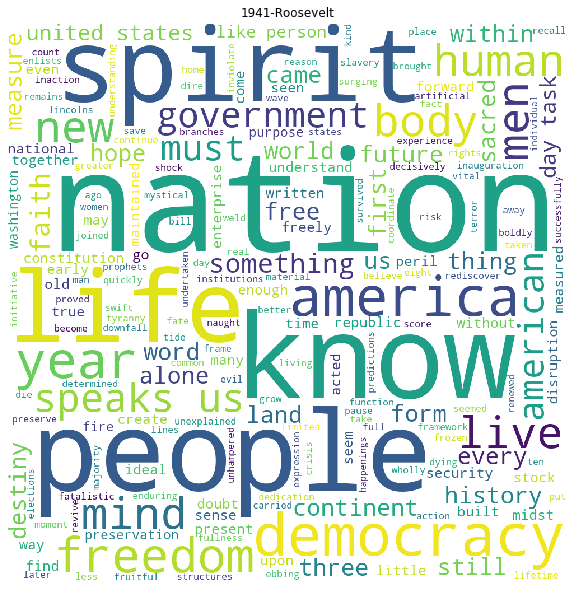

<Figure size 432x288 with 0 Axes>

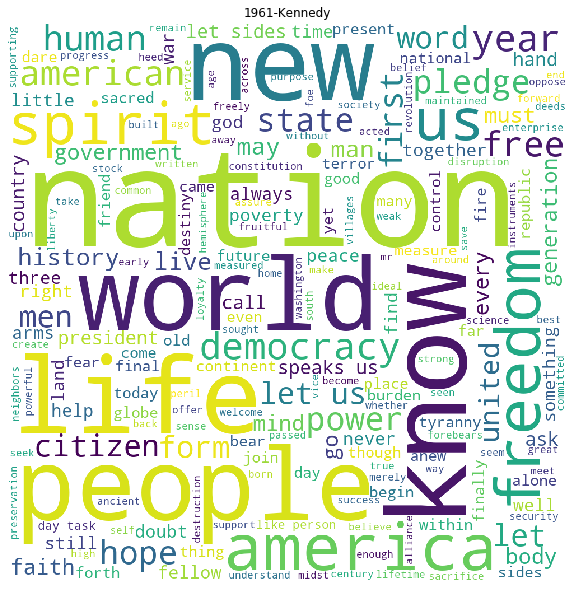

<Figure size 432x288 with 0 Axes>

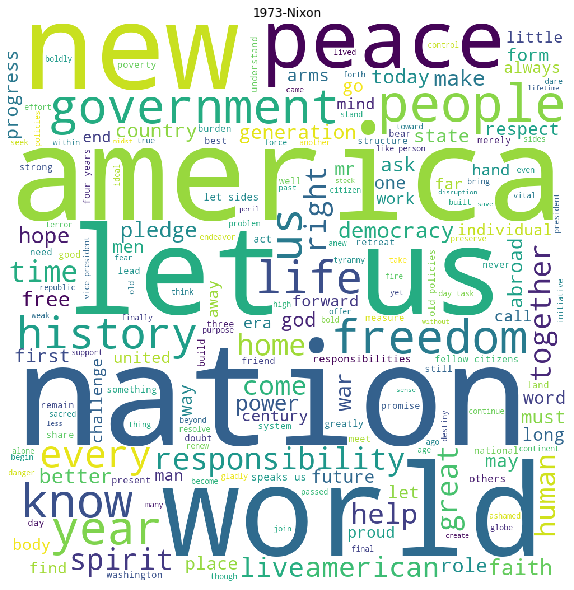

<Figure size 432x288 with 0 Axes>

In [84]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i,doc in doc_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.processed_speech) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

    comment_words = ' ' #empty string
    stop_words = set(STOPWORDS) #stopwords from Wordcloud

    for words in filtered_sentence:
        comment_words = comment_words + words + ' ' #converting to string
          
            
    wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title(i)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    filename=str(i)
    ext='.jpg'
    filename+=ext
    plt.savefig(filename)

In [89]:
img=[]                      

stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i,doc in doc_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.processed_speech) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

    comment_words = ' ' #empty string
    stop_words = set(STOPWORDS) #stopwords from Wordcloud

    for words in filtered_sentence:
        comment_words = comment_words + words + ' ' #converting to string
          
            
    wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
    
    img.append(wordcloud)
  
    

In [125]:
# plot the WordCloud image   
def print_wordcloud(i,pres_name):
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(i) 
    plt.title('Word Cloud - '+pres_name,fontsize=50)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

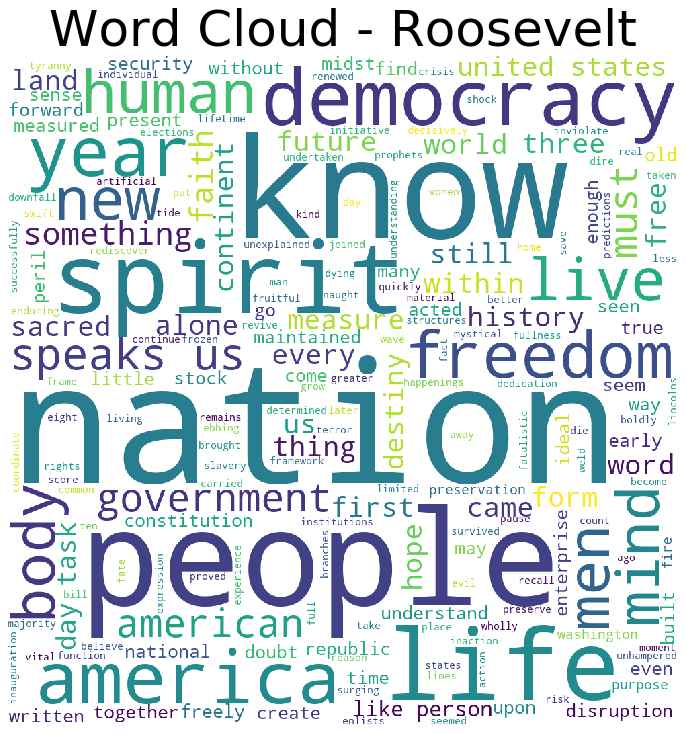

In [126]:
print_wordcloud(img[0],'Roosevelt')

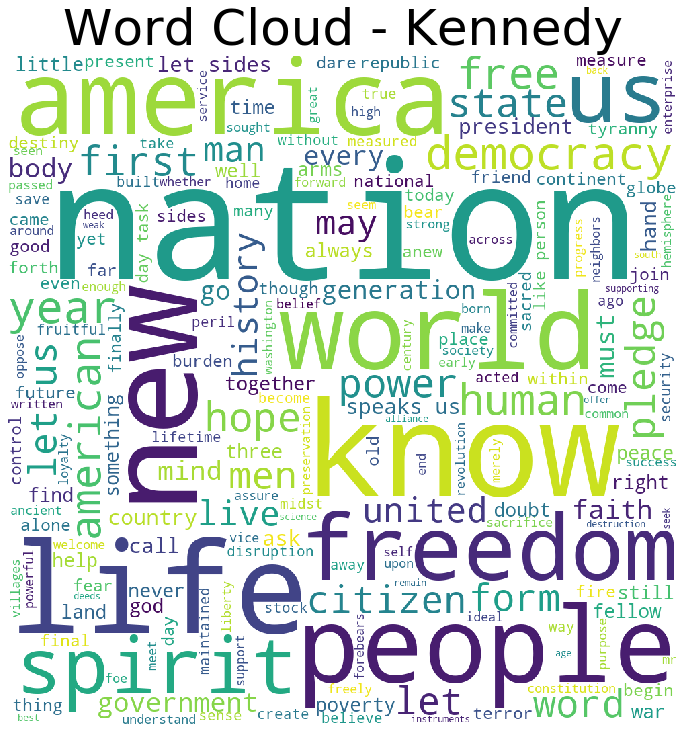

In [127]:
print_wordcloud(img[1],'Kennedy')

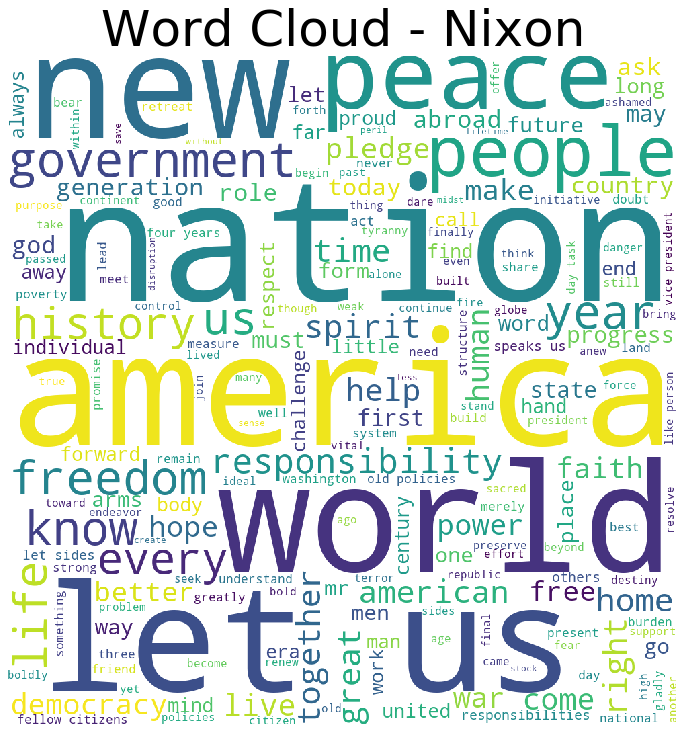

In [128]:
print_wordcloud(img[2],'Nixon')